In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential  
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.optimizers import SGD
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

# 載入資料

In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


# 觀察及處理資料

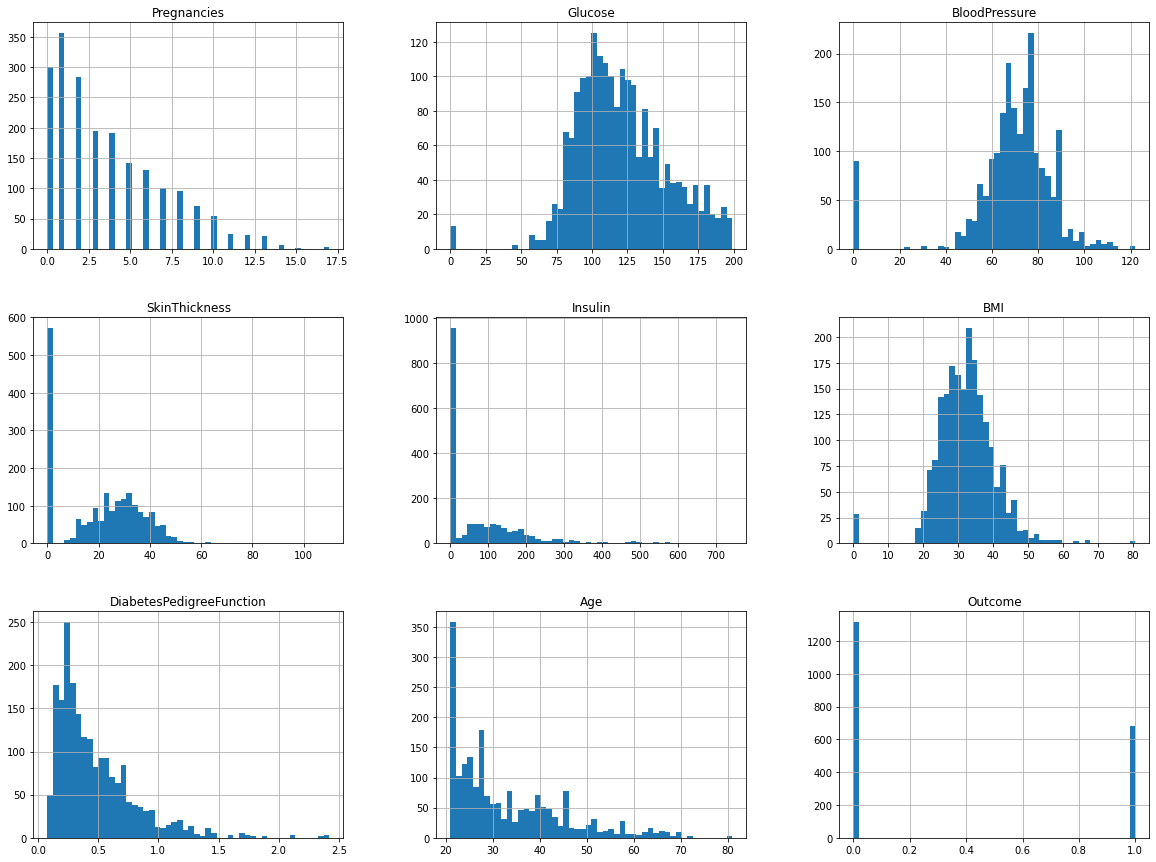

In [4]:
#各屬性值方圖
%matplotlib inline
import matplotlib.pyplot as plt
diabetes.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [5]:
diabetes.corr()      

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


# 使用原始資料建立模型

In [6]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [7]:
x = diabetes.drop("Outcome",axis=1)     #feature
y = diabetes["Outcome"]           #target

x_train_full,x_test,y_train_full,y_test=train_test_split(x,y,test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [8]:
x_train.shape

(1200, 8)

In [9]:
x_test.shape

(400, 8)

In [10]:
model = keras.Sequential([
  keras.layers.Dense(8, activation="relu", input_shape=(8,)),  
  keras.layers.Dense(4, activation="relu"),
  keras.layers.Dense(1,activation="sigmoid")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [11]:
sgd = SGD(lr=1e-3)
model.compile(loss="binary_crossentropy", optimizer="sgd",metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_valid, y_valid))

Epoch 1/100
38/38 [==============================] - 1s 24ms/step - loss: 0.8456 - accuracy: 0.3243 - val_loss: 0.7754 - val_accuracy: 0.3375
Epoch 2/100
38/38 [==============================] - 0s 2ms/step - loss: 0.7683 - accuracy: 0.3543 - val_loss: 0.7264 - val_accuracy: 0.3875
Epoch 3/100
38/38 [==============================] - 0s 2ms/step - loss: 0.7183 - accuracy: 0.4158 - val_loss: 0.6970 - val_accuracy: 0.5425
Epoch 4/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5436 - val_loss: 0.6780 - val_accuracy: 0.6350
Epoch 5/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5958 - val_loss: 0.6647 - val_accuracy: 0.6725
Epoch 6/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6722 - accuracy: 0.6277 - val_loss: 0.6549 - val_accuracy: 0.6825
Epoch 7/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.6668 - val_loss: 0.6476 - val_accuracy: 0.6725
Epoch 8/100


38/38 [==============================] - 0s 630us/step - loss: 0.4885 - accuracy: 0.7742
訓練資料集資訊：
loss = 0.49
準確度 = 0.77
-------------------------------------------
13/13 [==============================] - 0s 748us/step - loss: 0.4999 - accuracy: 0.7675
驗證資料集資訊：
loss = 0.50
準確度 = 0.77


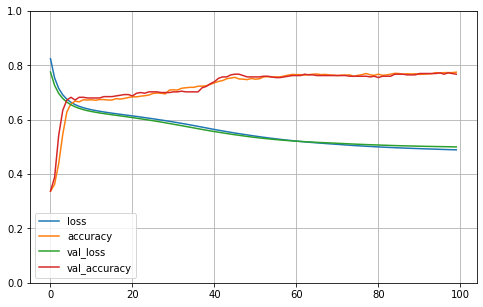

-------------------------------------------
13/13 [==============================] - 0s 582us/step - loss: 0.5072 - accuracy: 0.7775
測試資料集資訊：
loss = 0.51
準確度 = 0.78


In [12]:
loss, accuracy = model.evaluate(x_train, y_train)         
print("訓練資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      
print("-------------------------------------------")
loss, accuracy = model.evaluate(x_valid, y_valid)
print("驗證資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("keras_learning_curves_plot")
plt.show()
print("-------------------------------------------")
loss, accuracy = model.evaluate(x_test, y_test)
print("測試資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))

# 移除與目標相關性小於0.1的特徵

In [13]:
df = diabetes.drop(labels=["BloodPressure","SkinThickness"],axis=1)

In [14]:
x_new = df.drop("Outcome",axis=1)     #feature
y_new = df["Outcome"]           #target

In [15]:
x_new = df.drop("Outcome",axis=1)     #feature
y_new = df["Outcome"]           #target

x_train_full,x_test,y_train_full,y_test=train_test_split(x_new,y_new,test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [16]:
model = keras.Sequential([
  keras.layers.Dense(12, activation="relu", input_shape=(6,)),  
  keras.layers.Dense(8, activation="relu"),
  keras.layers.Dense(1,activation="sigmoid")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                84        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 197
Trainable params: 197
Non-trainable params: 0
_________________________________________________________________


In [17]:
x_train.shape

(1200, 6)

In [18]:
x_test.shape

(400, 6)

In [19]:
sgd = SGD(lr=1e-3)
model.compile(loss="binary_crossentropy", optimizer="sgd",metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=100, batch_size=40, validation_data=(x_valid, y_valid))

Epoch 1/100
30/30 [==============================] - 1s 7ms/step - loss: 0.6504 - accuracy: 0.6556 - val_loss: 0.6222 - val_accuracy: 0.7025
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6189 - accuracy: 0.6966 - val_loss: 0.5923 - val_accuracy: 0.7050
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.5834 - accuracy: 0.7221 - val_loss: 0.5706 - val_accuracy: 0.7150
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 0.5783 - accuracy: 0.7170 - val_loss: 0.5544 - val_accuracy: 0.7225
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 0.5712 - accuracy: 0.7134 - val_loss: 0.5422 - val_accuracy: 0.7250
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 0.5552 - accuracy: 0.7333 - val_loss: 0.5327 - val_accuracy: 0.7350
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 0.5517 - accuracy: 0.7240 - val_loss: 0.5249 - val_accuracy: 0.7300
Epoch 8/100
3

38/38 [==============================] - 0s 860us/step - loss: 0.4539 - accuracy: 0.7800
訓練資料集資訊：
loss = 0.45
準確度 = 0.78
-------------------------------------------
13/13 [==============================] - 0s 903us/step - loss: 0.4252 - accuracy: 0.7875
驗證資料集資訊：
loss = 0.43
準確度 = 0.79


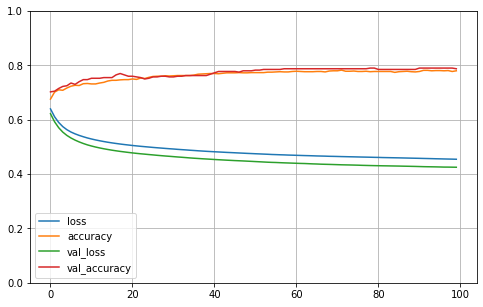

-------------------------------------------
13/13 [==============================] - 0s 1ms/step - loss: 0.4539 - accuracy: 0.7650
測試資料集資訊：
loss = 0.45
準確度 = 0.76


In [20]:
loss, accuracy = model.evaluate(x_train, y_train)         
print("訓練資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      
print("-------------------------------------------")
loss, accuracy = model.evaluate(x_valid, y_valid)
print("驗證資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("keras_learning_curves_plot")
plt.show()
print("-------------------------------------------")
loss, accuracy = model.evaluate(x_test, y_test)
print("測試資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))

# He初始化&觸發函數elu

In [21]:
x = diabetes.drop("Outcome",axis=1)     #feature
y = diabetes["Outcome"]           #target

x_train_full,x_test,y_train_full,y_test=train_test_split(x,y,test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [22]:
model = keras.Sequential([
  keras.layers.Dense(12, activation="elu", input_shape=(8,)),  
  keras.layers.Dense(8, activation="elu", kernel_initializer="he_normal"),
  keras.layers.Dense(1,activation="sigmoid")
])

model.summary()

sgd = SGD(lr=1e-3)
model.compile(loss="binary_crossentropy", optimizer="sgd",metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=100, batch_size=40, validation_data=(x_valid, y_valid))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
30/30 [==============================] - 0s 6ms/step - loss: 0.6410 - accuracy: 0.6541 - val_loss: 0.5696 - val_accuracy: 0.7125
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 0.5711 - accuracy: 0.7347 - val_loss: 0.5350 - val_accuracy: 0.7575
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 0.5530 - accuracy: 0.7361 - val

38/38 [==============================] - 0s 760us/step - loss: 0.4315 - accuracy: 0.7817
訓練資料集資訊：
loss = 0.43
準確度 = 0.78
-------------------------------------------
13/13 [==============================] - 0s 954us/step - loss: 0.4253 - accuracy: 0.8225
驗證資料集資訊：
loss = 0.43
準確度 = 0.82


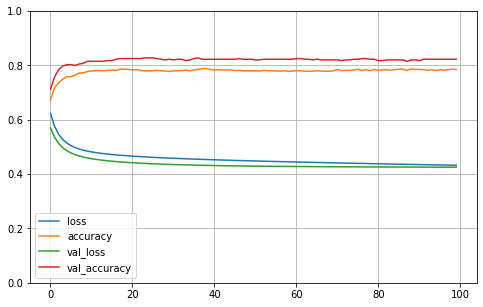

-------------------------------------------
13/13 [==============================] - 0s 998us/step - loss: 0.5024 - accuracy: 0.7575
測試資料集資訊：
loss = 0.50
準確度 = 0.76


In [23]:
loss, accuracy = model.evaluate(x_train, y_train)         
print("訓練資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      
print("-------------------------------------------")
loss, accuracy = model.evaluate(x_valid, y_valid)
print("驗證資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("keras_learning_curves_plot")
plt.show()
print("-------------------------------------------")
loss, accuracy = model.evaluate(x_test, y_test)
print("測試資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))

# 使用不同優化法(Adam、RSMprop、Nadam)

### Adam

In [24]:
x = diabetes.drop("Outcome",axis=1)     #feature
y = diabetes["Outcome"]           #target

x_train_full,x_test,y_train_full,y_test=train_test_split(x,y,test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [25]:
model = keras.Sequential([
  keras.layers.Dense(12, activation="relu", input_shape=(8,)),  
  keras.layers.Dense(8, activation="relu"),
  keras.layers.Dense(1,activation="sigmoid")
])

model.summary()

adam = Adam(lr=1e-3)
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=100, batch_size=40, validation_data=(x_valid, y_valid))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
30/30 [==============================] - 1s 6ms/step - loss: 0.8087 - accuracy: 0.3384 - val_loss: 0.7263 - val_accuracy: 0.5050
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 0.7230 - accuracy: 0.5107 - val_loss: 0.6641 - val_accuracy: 0.6125
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6423 - accuracy: 0.6613 - val

38/38 [==============================] - 0s 782us/step - loss: 0.3675 - accuracy: 0.8392
訓練資料集資訊：
loss = 0.37
準確度 = 0.84
-------------------------------------------
13/13 [==============================] - 0s 897us/step - loss: 0.4060 - accuracy: 0.8050
驗證資料集資訊：
loss = 0.41
準確度 = 0.81


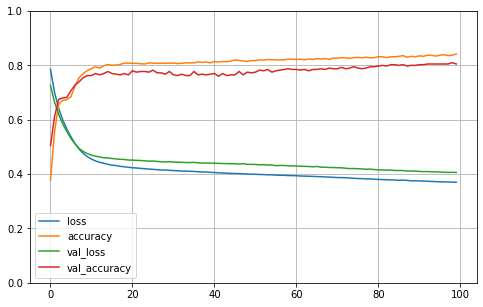

-------------------------------------------
13/13 [==============================] - 0s 2ms/step - loss: 0.4486 - accuracy: 0.7925
測試資料集資訊：
loss = 0.45
準確度 = 0.79


In [26]:
loss, accuracy = model.evaluate(x_train, y_train)         
print("訓練資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      
print("-------------------------------------------")
loss, accuracy = model.evaluate(x_valid, y_valid)
print("驗證資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("keras_learning_curves_plot")
plt.show()
print("-------------------------------------------")
loss, accuracy = model.evaluate(x_test, y_test)
print("測試資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))

### RMSprop

In [27]:
from keras.optimizers import RMSprop

model = keras.Sequential([
  keras.layers.Dense(12, activation="relu", input_shape=(8,)),  
  keras.layers.Dense(8, activation="relu"),
  keras.layers.Dense(1,activation="sigmoid")
])

model.summary()

rmsprop = RMSprop(lr=1e-3)
model.compile(loss="binary_crossentropy", optimizer="rmsprop",metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=100, batch_size=40, validation_data=(x_valid, y_valid))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
30/30 [==============================] - 1s 6ms/step - loss: 0.7058 - accuracy: 0.4650 - val_loss: 0.6647 - val_accuracy: 0.6800
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6549 - accuracy: 0.7146 - val_loss: 0.6254 - val_accuracy: 0.7375
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6141 - accuracy: 0.7427 - val

38/38 [==============================] - 0s 809us/step - loss: 0.3650 - accuracy: 0.8358
訓練資料集資訊：
loss = 0.37
準確度 = 0.84
-------------------------------------------
13/13 [==============================] - 0s 1ms/step - loss: 0.4425 - accuracy: 0.7850
驗證資料集資訊：
loss = 0.44
準確度 = 0.79


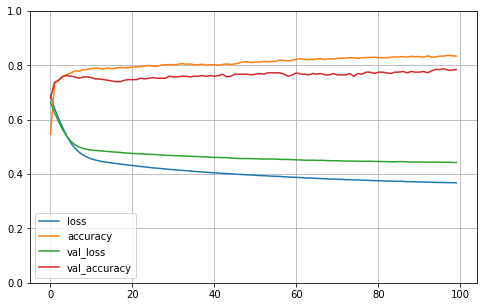

-------------------------------------------
13/13 [==============================] - 0s 1ms/step - loss: 0.4453 - accuracy: 0.7700
測試資料集資訊：
loss = 0.45
準確度 = 0.77


In [28]:
loss, accuracy = model.evaluate(x_train, y_train)         
print("訓練資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      
print("-------------------------------------------")
loss, accuracy = model.evaluate(x_valid, y_valid)
print("驗證資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("keras_learning_curves_plot")
plt.show()
print("-------------------------------------------")
loss, accuracy = model.evaluate(x_test, y_test)
print("測試資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))

### Nadam

In [29]:
from keras.optimizers import Nadam

model = keras.Sequential([
  keras.layers.Dense(12, activation="relu", input_shape=(8,)),  
  keras.layers.Dense(8, activation="relu"),
  keras.layers.Dense(1,activation="sigmoid")
])

model.summary()

nadam = Nadam(lr=1e-3)
model.compile(loss="binary_crossentropy", optimizer="nadam",metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=100, batch_size=40, validation_data=(x_valid, y_valid))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
30/30 [==============================] - 1s 6ms/step - loss: 0.6357 - accuracy: 0.6557 - val_loss: 0.6199 - val_accuracy: 0.6675
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6085 - accuracy: 0.6778 - val_loss: 0.5992 - val_accuracy: 0.6650
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.5859 - accuracy: 0.6763 - val

38/38 [==============================] - 0s 838us/step - loss: 0.3595 - accuracy: 0.8408
訓練資料集資訊：
loss = 0.36
準確度 = 0.84
-------------------------------------------
13/13 [==============================] - 0s 884us/step - loss: 0.4076 - accuracy: 0.8000
驗證資料集資訊：
loss = 0.41
準確度 = 0.80


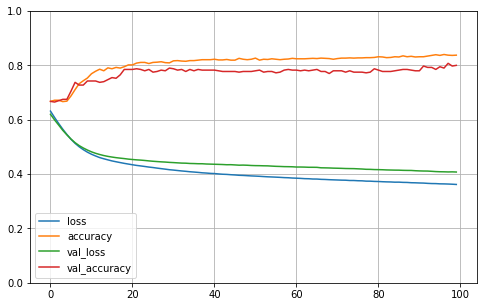

-------------------------------------------
13/13 [==============================] - 0s 2ms/step - loss: 0.4408 - accuracy: 0.7875
測試資料集資訊：
loss = 0.44
準確度 = 0.79


In [30]:
loss, accuracy = model.evaluate(x_train, y_train)         
print("訓練資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      
print("-------------------------------------------")
loss, accuracy = model.evaluate(x_valid, y_valid)
print("驗證資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("keras_learning_curves_plot")
plt.show()
print("-------------------------------------------")
loss, accuracy = model.evaluate(x_test, y_test)
print("測試資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))

# 批次正規化

In [31]:
model = keras.Sequential([
    keras.layers.Dense(12, activation="relu", input_shape=(8,)), 
    keras.layers.BatchNormalization(),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1,activation="sigmoid")
])

model.summary()

sgd = SGD(lr=0.001)
model.compile(loss="binary_crossentropy", optimizer="sgd",metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=100, batch_size=40, validation_data=(x_valid, y_valid))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 12)                108       
_________________________________________________________________
batch_normalization (BatchNo (None, 12)                48        
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 104       
_________________________________________________________________
batch_normalization_1 (Batch (None, 8)                 32        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 9         
Total params: 301
Trainable params: 261
Non-trainable params: 40
_________________________________________________________________
Epoch 1/100
30/30 [==============================] - 1s 8ms/step - loss: 0.9061 - accuracy: 0.4633 - val_loss: 0.6708 - v

38/38 [==============================] - 0s 2ms/step - loss: 0.3838 - accuracy: 0.8175
訓練資料集資訊：
loss = 0.38
準確度 = 0.82
-------------------------------------------
13/13 [==============================] - 0s 997us/step - loss: 0.4439 - accuracy: 0.7850
驗證資料集資訊：
loss = 0.44
準確度 = 0.79


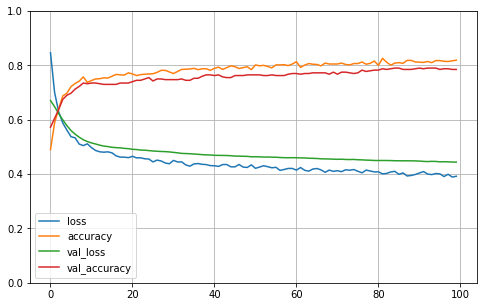

-------------------------------------------
13/13 [==============================] - 0s 1ms/step - loss: 0.4709 - accuracy: 0.7550
測試資料集資訊：
loss = 0.47
準確度 = 0.75


In [32]:
loss, accuracy = model.evaluate(x_train, y_train)         
print("訓練資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      
print("-------------------------------------------")
loss, accuracy = model.evaluate(x_valid, y_valid)
print("驗證資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("keras_learning_curves_plot")
plt.show()
print("-------------------------------------------")
loss, accuracy = model.evaluate(x_test, y_test)
print("測試資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))

In [33]:
model = keras.Sequential([
    keras.layers.Dense(12, activation="relu", input_shape=(8,)), 
    keras.layers.BatchNormalization(),
    keras.layers.Dense(8, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

model.summary()

sgd = SGD(lr=0.001)
model.compile(loss="binary_crossentropy", optimizer="sgd",metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=100, batch_size=40, validation_data=(x_valid, y_valid))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 12)                108       
_________________________________________________________________
batch_normalization_2 (Batch (None, 12)                48        
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 96        
_________________________________________________________________
batch_normalization_3 (Batch (None, 8)                 32        
_________________________________________________________________
activation (Activation)      (None, 8)                 0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 9         
Total params: 293
Trainable params: 253
Non-trainable params: 40
_______________________________________________________

38/38 [==============================] - 0s 970us/step - loss: 0.4182 - accuracy: 0.8158
訓練資料集資訊：
loss = 0.42
準確度 = 0.82
-------------------------------------------
13/13 [==============================] - 0s 3ms/step - loss: 0.4686 - accuracy: 0.7725
驗證資料集資訊：
loss = 0.47
準確度 = 0.77


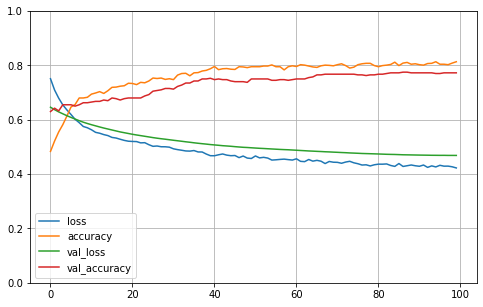

-------------------------------------------
13/13 [==============================] - 0s 1ms/step - loss: 0.4644 - accuracy: 0.7950
測試資料集資訊：
loss = 0.46
準確度 = 0.80


In [34]:
loss, accuracy = model.evaluate(x_train, y_train)         
print("訓練資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      
print("-------------------------------------------")
loss, accuracy = model.evaluate(x_valid, y_valid)
print("驗證資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("keras_learning_curves_plot")
plt.show()
print("-------------------------------------------")
loss, accuracy = model.evaluate(x_test, y_test)
print("測試資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))

# 正則化

In [42]:
model = keras.Sequential([
  keras.layers.Dense(12, activation="relu", input_shape=(8,)),  
  keras.layers.Dense(8, activation="relu"),
  keras.layers.Dense(1,activation="sigmoid")
])

model.summary()

sgd = SGD(lr=0.001)
model.compile(loss="binary_crossentropy", optimizer="sgd",metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=100, batch_size=40, validation_data=(x_valid, y_valid))

from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_loss', patience=30, verbose=1)
model.fit(x_train,y_train,batch_size=100,epochs=100, validation_data = (x_valid, y_valid),callbacks = [earlystop])

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_36 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
30/30 [==============================] - 0s 7ms/step - loss: 0.6170 - accuracy: 0.6678 - val_loss: 0.6174 - val_accuracy: 0.6275
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6222 - accuracy: 0.6700 - val_loss: 0.6071 - val_accuracy: 0.6300
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.5982 - accuracy: 0.6970 - va

38/38 [==============================] - 0s 864us/step - loss: 0.4116 - accuracy: 0.8183
訓練資料集資訊：
loss = 0.41
準確度 = 0.82
-------------------------------------------
13/13 [==============================] - 0s 2ms/step - loss: 0.4602 - accuracy: 0.7575
驗證資料集資訊：
loss = 0.46
準確度 = 0.76


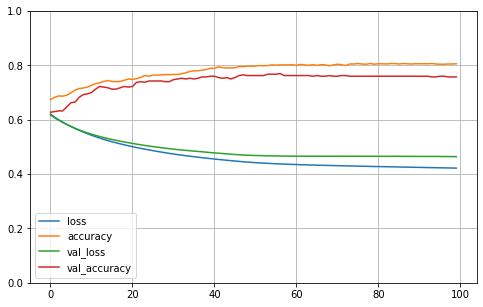

-------------------------------------------
13/13 [==============================] - 0s 1ms/step - loss: 0.4782 - accuracy: 0.7675
測試資料集資訊：
loss = 0.48
準確度 = 0.77


In [43]:
loss, accuracy = model.evaluate(x_train, y_train)         
print("訓練資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      
print("-------------------------------------------")
loss, accuracy = model.evaluate(x_valid, y_valid)
print("驗證資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("keras_learning_curves_plot")
plt.show()
print("-------------------------------------------")
loss, accuracy = model.evaluate(x_test, y_test)
print("測試資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))

In [ ]:
model = keras.Sequential([
  keras.layers.Dense(12, activation="relu", input_shape=(8,),kernel_regularizer=keras.regularizers.l2(0.02)),  
  keras.layers.Dense(8, activation="relu",kernel_regularizer=keras.regularizers.l2(0.02)),
  keras.layers.Dense(1,activation="sigmoid",kernel_regularizer=keras.regularizers.l2(0.02))
])

model.summary()

sgd = SGD(lr=0.001)
model.compile(loss="binary_crossentropy", optimizer="sgd",metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=100, batch_size=40, validation_data=(x_valid, y_valid))

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_49 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
30/30 [==============================] - 0s 6ms/step - loss: 1.2629 - accuracy: 0.4323 - val_loss: 1.1801 - val_accuracy: 0.4850
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 1.1459 - accuracy: 0.5207 - val_loss: 1.1044 - val_accuracy: 0.5700
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 1.0877 - accuracy: 0.6216 - va

38/38 [==============================] - 0s 770us/step - loss: 0.4223 - accuracy: 0.8108
訓練資料集資訊：
loss = 0.42
準確度 = 0.81
-------------------------------------------
13/13 [==============================] - 0s 1ms/step - loss: 0.4698 - accuracy: 0.7675
驗證資料集資訊：
loss = 0.47
準確度 = 0.77


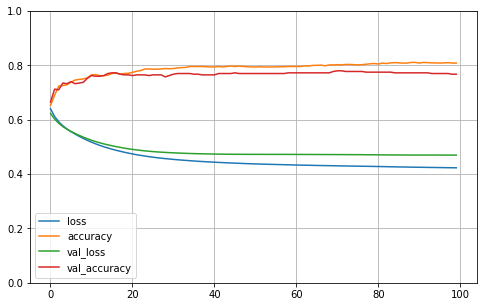

-------------------------------------------
13/13 [==============================] - 0s 1ms/step - loss: 0.4887 - accuracy: 0.7475
測試資料集資訊：
loss = 0.49
準確度 = 0.75


In [36]:
loss, accuracy = model.evaluate(x_train, y_train)         
print("訓練資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      
print("-------------------------------------------")
loss, accuracy = model.evaluate(x_valid, y_valid)
print("驗證資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("keras_learning_curves_plot")
plt.show()
print("-------------------------------------------")
loss, accuracy = model.evaluate(x_test, y_test)
print("測試資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))

In [37]:
model = keras.Sequential([
    keras.layers.Dense(12, activation="relu", input_shape=(8,)),  
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(1,activation="sigmoid")
])

model.summary()

sgd = SGD(lr=0.001)
model.compile(loss="binary_crossentropy", optimizer="sgd",metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=100, batch_size=40, validation_data=(x_valid, y_valid))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 12)                108       
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 8)                 104       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
30/30 [==============================] - 1s 8ms/step - loss: 0.7299 - accuracy: 0.6566 - val_loss: 0.6692 - va

38/38 [==============================] - 0s 730us/step - loss: 0.4531 - accuracy: 0.7908
訓練資料集資訊：
loss = 0.45
準確度 = 0.79
-------------------------------------------
13/13 [==============================] - 0s 914us/step - loss: 0.4744 - accuracy: 0.7650
驗證資料集資訊：
loss = 0.47
準確度 = 0.76


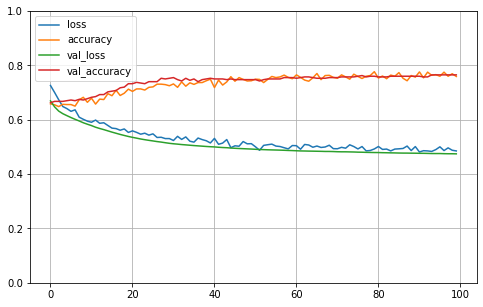

-------------------------------------------
13/13 [==============================] - 0s 914us/step - loss: 0.4931 - accuracy: 0.7775
測試資料集資訊：
loss = 0.49
準確度 = 0.78


In [38]:
loss, accuracy = model.evaluate(x_train, y_train)         
print("訓練資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      
print("-------------------------------------------")
loss, accuracy = model.evaluate(x_valid, y_valid)
print("驗證資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("keras_learning_curves_plot")
plt.show()
print("-------------------------------------------")
loss, accuracy = model.evaluate(x_test, y_test)
print("測試資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))

# 綜合

In [39]:
from keras.optimizers import RMSprop

model = keras.Sequential([
    keras.layers.Dense(4, activation="relu", input_shape=(8,)),
    #keras.layers.Dropout(rate=0.5),
    #keras.layers.Dense(4, activation="relu"),
    keras.layers.Dropout(rate=0.4),
  keras.layers.Dense(1,activation="sigmoid")
])

model.summary()

rmsprop = RMSprop(lr=1e-3)
model.compile(loss="binary_crossentropy", optimizer="rmsprop",metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=40, batch_size=8, validation_data=(x_valid, y_valid))

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 4)                 36        
_________________________________________________________________
dropout_2 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 5         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
150/150 [==============================] - 1s 2ms/step - loss: 0.7284 - accuracy: 0.6613 - val_loss: 0.6643 - val_accuracy: 0.7025
Epoch 2/40
150/150 [==============================] - 0s 2ms/step - loss: 0.6451 - accuracy: 0.6943 - val_loss: 0.6189 - val_accuracy: 0.7100
Epoch 3/40
150/150 [==============================] - 0s 996us/step - loss: 0.6306 - accuracy: 0.6942 -

38/38 [==============================] - 0s 836us/step - loss: 0.4480 - accuracy: 0.7933
訓練資料集資訊：
loss = 0.45
準確度 = 0.79
-------------------------------------------
13/13 [==============================] - 0s 984us/step - loss: 0.4889 - accuracy: 0.7750
驗證資料集資訊：
loss = 0.49
準確度 = 0.77


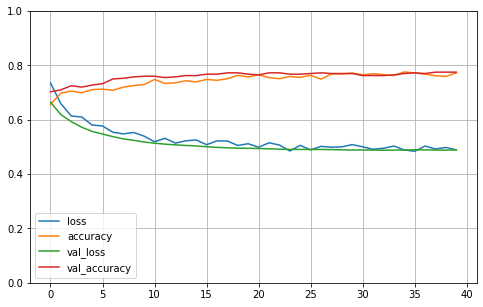

-------------------------------------------
13/13 [==============================] - 0s 833us/step - loss: 0.5109 - accuracy: 0.7600
測試資料集資訊：
loss = 0.51
準確度 = 0.76


In [40]:
loss, accuracy = model.evaluate(x_train, y_train)         
print("訓練資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      
print("-------------------------------------------")
loss, accuracy = model.evaluate(x_valid, y_valid)
print("驗證資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("keras_learning_curves_plot")
plt.show()
print("-------------------------------------------")
loss, accuracy = model.evaluate(x_test, y_test)
print("測試資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))